# Imports, helpers, and data loading

Refer:
(1) https://keras.io/
(2)	https://colab.research.google.com/github/csc-training/intro-to-dl/blob/master/day1/keras-imdb-rnn.ipynb#scrollTo=rrT6t3BNCI0d
(3) https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb
(4) https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff
(5) https://livebook.manning.com/#!/book/deep-learning-with-python/chapter-6/83
(6) https://keras.io/datasets/
(7) https://www.kaggle.com/iarunava/imdb-movie-reviews-dataset

In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import json

print('Some configurations')

# ## Configuration ##
# number of most-frequent words to use
nb_words = 10000
# cut reviews/sentences after this number of words
maxlen = 256
# model parameters:
embedding_dims = 50  # set same with that in tensorflow model.
epochs = 10
validation_split = 0.2  # 20% for validation, 80% for training
# ####################

print('Load Keras IMDB data.')
# Keras imdb dataset: 25000 for training, 25000 for testing
# positive:1, negative: 0
# each word has been replaced by integer index
# each review (sentence) is varying-length sequence of integers
# Word index begin at "3"
# as "1" is to mark the start of a review and 
# "2" represents all out-of-vocabulary words.
# "0" will be used later to pad shorter reviews/setences to a fixed size.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=nb_words)
print('Before padding, x_train:{0}'.format(x_train.shape))
print('Before padding, x_test:{0}'.format(x_test.shape))

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('After padding, x_train:{0}'.format(x_train.shape))
print('After padding, x_test:{0}'.format(x_test.shape))

# Helpers
def log(s):
    print(s)
    with open("keras_results.txt", "a") as myfile:
        myfile.write(s)
        
def logResult(key, value):
    filename = 'keras_results.json'
    with open(filename, 'r') as f:
        j = json.load(f)
        
    if key in j:
        j[key].append(value)
    else:
        j[key] = [value]
    
    with open(filename, 'w') as f:
        json.dump(j, f, indent=4)

Some configurations
Load Keras IMDB data.
Before padding, x_train:(25000,)
Before padding, x_test:(25000,)
Pad sequences (samples x time)
After padding, x_train:(25000, 256)
After padding, x_test:(25000, 256)


# Main play function

In [3]:
def play(NUM_UNITS, CELL_TYPE):
    assert CELL_TYPE == 'rnn' or CELL_TYPE == 'lstm'
    key = 'cell_type = {0}, nb_words = {1}, maxlen = {2}, embedding_dims = {3}, num_units = {4}\n'.format(
        CELL_TYPE, nb_words, maxlen, embedding_dims, NUM_UNITS)
    log(key)

    print('Build model.')
    model = Sequential()

    model.add(Embedding(nb_words, # size of the vocabulary
                        embedding_dims, # Dimension of dense embedding
                        input_length=maxlen # Length of input sequences
                       ))

    model.add(Dropout(0.75))

    model.add(SimpleRNN(NUM_UNITS) if CELL_TYPE == 'rnn' else LSTM(NUM_UNITS))
    # An example of using two RNN layers:
    #model.add(LSTM(num_units, return_sequences=True))
    #model.add(LSTM(num_units))

    model.add(Dense(1, activation='sigmoid'))

    # try using different optimizers and different optimizer configs
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    print(model.summary())

    history = model.fit(x_train, y_train,
                        batch_size=24,
                        epochs=epochs, 
                        validation_split=validation_split)
    
    print('history={0}'.format(history))

    scores = model.evaluate(x_test, y_test, verbose=2)
    log('{0} = {1}\n'.format(model.metrics_names[1], scores[1]))
    logResult(key, scores[1])

# Run experiments

In [22]:
play(20, 'rnn')

cell_type = rnn, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 20

Build model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 256, 50)           500000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256, 50)           0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 20)                1420      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 501,441
Trainable params: 501,441
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.6082 - acc: 0.6438 - val_loss: 0.5

In [23]:
play(50, 'rnn')

cell_type = rnn, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 50

Build model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 256, 50)           500000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256, 50)           0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 505,101
Trainable params: 505,101
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.6562 - acc: 0.5880 - val_loss: 0.4

In [24]:
play(100, 'rnn')

cell_type = rnn, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 100

Build model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 256, 50)           500000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256, 50)           0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 100)               15100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 515,201
Trainable params: 515,201
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.6789 - acc: 0.5608 - val_loss: 0.

In [25]:
play(200, 'rnn')

cell_type = rnn, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 200

Build model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 256, 50)           500000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256, 50)           0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 200)               50200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 201       
Total params: 550,401
Trainable params: 550,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 125s 6ms/step - loss: 0.7055 - acc: 0.5001 - val_loss: 0

In [26]:
play(500, 'rnn')

cell_type = rnn, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 500

Build model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 256, 50)           500000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256, 50)           0         
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 500)               275500    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 501       
Total params: 776,001
Trainable params: 776,001
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 388s 19ms/step - loss: 0.7135 - acc: 0.5039 - val_loss: 

In [30]:
play(200, 'lstm')

cell_type = lstm, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 200

Build model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 256, 50)           500000    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256, 50)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 200)               200800    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 201       
Total params: 701,001
Trainable params: 701,001
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 213s 11ms/step - loss: 0.5641 - acc: 0.7112 - val_loss:

In [2]:
import json
filename = 'keras_results.json'
with open(filename, 'r') as f:
    j = json.load(f)
    print(json.dumps(j, indent=4))

{
    "cell_type = rnn, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 200\n": [
        0.792
    ], 
    "cell_type = lstm, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 200\n": [
        0.87376
    ], 
    "cell_type = rnn, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 100\n": [
        0.83504
    ], 
    "cell_type = lstm, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 500\n": [
        0.87708
    ], 
    "cell_type = lstm, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 50\n": [
        0.8814
    ], 
    "cell_type = rnn, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 50\n": [
        0.84688
    ], 
    "cell_type = rnn, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 20\n": [
        0.86
    ], 
    "cell_type = lstm, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 100\n": [
        0.87804
    ], 
    "cell_type = rnn, nb_words = 10

In [4]:
old_epochs = epochs
epochs = 20
play(20, 'lstm')
epochs = old_epochs

cell_type = lstm, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 20

Build model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 256, 50)           500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                5680      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 505,701
Trainable params: 505,701
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 179s 9ms/step - loss: 0.5147 - acc: 0.7377 - val_loss: 0

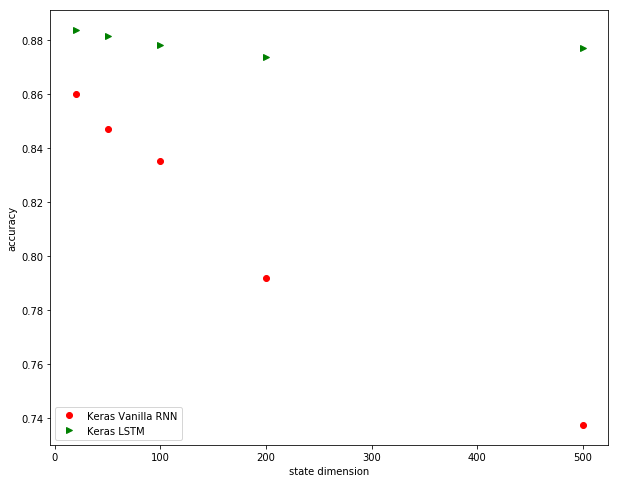

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot([20, 50, 100, 200, 500], [0.86, 0.84688, 0.83504, 0.792, 0.7374], 'ro', label='Keras Vanilla RNN') # rnn
plt.plot([20, 50, 100, 200, 500], [0.88376, 0.8814, 0.87804, 0.87376, 0.87708], 'g>', label='Keras LSTM') # lstm
plt.legend()
plt.xlabel('state dimension')
plt.ylabel('accuracy')
plt.show()

In [16]:
old_epochs = epochs
epochs = 20
play(500, 'lstm')
epochs = old_epochs

cell_type = lstm, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 500

Build model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 256, 50)           500000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 500)               1102000   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 1,602,501
Trainable params: 1,602,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 859s 43ms/step - loss: 0.6716 - acc: 0.6098 - val_l

In [17]:
old_epochs = epochs
epochs = 20
play(50, 'lstm')
epochs = old_epochs

cell_type = lstm, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 50

Build model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 256, 50)           500000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256, 50)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 520,251
Trainable params: 520,251
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 219s 11ms/step - loss: 0.4711 - acc: 0.7740 - val_loss: 

In [18]:
old_epochs = epochs
epochs = 20
play(100, 'lstm')
epochs = old_epochs

cell_type = lstm, nb_words = 10000, maxlen = 256, embedding_dims = 50, num_units = 100

Build model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 256, 50)           500000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256, 50)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 560,501
Trainable params: 560,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 229s 11ms/step - loss: 0.5225 - acc: 0.7368 - val_loss:

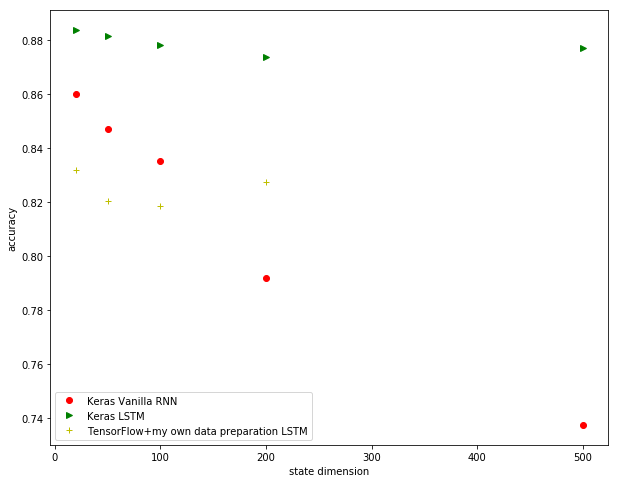

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot([20, 50, 100, 200, 500], [0.86, 0.84688, 0.83504, 0.792, 0.7374], 'ro', label='Keras Vanilla RNN') # rnn
plt.plot([20, 50, 100, 200, 500], [0.88376, 0.8814, 0.87804, 0.87376, 0.87708], 'g>', label='Keras LSTM') # lstm
plt.plot([20, 50, 100, 200], [0.83164, 0.82052, 0.81856, 0.8272], 'y+', label='TensorFlow+my own data preparation LSTM') # tensorflow lstm
plt.legend()
plt.xlabel('state dimension')
plt.ylabel('accuracy')
plt.show()